# Notebook to explore the BOLDMoments data

**Data location:** /oliva/blahner/BOLDMoments/preprocessed_data/responses.

Reminder that reconstruction should be done per subject. Subject 1 is good. 
To get started, use: ./sub01/testing/X_TRavg-56789testing.pkl, where X is either the ROI name or WB (whole brain). The contents of the pkl file is a dict with keys "test_data" and "train_data" with shapes (num_videos, num_repetitions, num_voxels). Feel free to average over repetitions. You can also find the metadata json file and video stimuli in /oliva/datasets/BOLDMoments/metadata.


For time-resolved brain activity, use /sub01/testing/X_TRavg-Ytesting.pkl where Y is 5, 6, 7, 8, or 9. Don't worry about numbers 1-4. But I'd first start with the 56789avg to make sure we can get some reconstruction.


### FAQ
1. **Training vs testing folder?**

The data in the “testing” folder folder contains keys of “test_data” and “train_data”, so everything you need is in there. The reason why we have a dedicated “training” folder was for the challenge, where we didn’t want to release any test data. The “train_data” key in the “testing” folder is an exact copy of the data in the “training” folder.

2. **What are the different brain areas?**

PPA is scene-selective, LOC is object selective, OFA is face selective. PFop and PFt don’t have as nice a functional description, but are thought to be involved in a action mirroring network. More info to be added.

3. **What does time resolved mean?**

By time-resolved, we mean samples from different time points along the BOLD signal. There is not a straightforward mapping between time points along the BOLD signal and time points in the video. Different brain regions integrate information over time differently. So lots of open questions there, but in general we show that early (late) video frames correspond to early (late) samples along the BOLD signal

In [1]:
import sys
import os
import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Analyze betas_raw

In [3]:
# Load pkl file with moments data

with open("../data/betas_raw/sub01/WB_TRavg-56789_testing.pkl", "rb") as f:
    data = pkl.load(f)

print(data.keys())

# Print out the shapes of all the values
for key in data.keys():
    print(key, data[key].shape)
    

dict_keys(['noise_ceiling', 'p_values', 'nan_indices', 'train_data', 'test_data'])
noise_ceiling (98273,)
p_values (98273,)
nan_indices (416761,)
train_data (1000, 3, 18320)
test_data (102, 10, 18320)


In [7]:
# View (num_videos, num_repetitions, num_voxels) for each key
print(data['test_data'].shape)
print(data['train_data'].shape)
print(data['noise_ceiling'].shape)
print(data['p_values'].shape)


(102, 10, 18320)
(1000, 3, 18320)
(98273,)
(98273,)


(102, 18320)


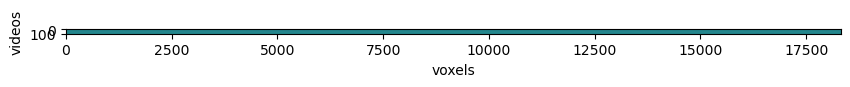

In [8]:
# Plot average value per voxel

def avg_value_per_voxel(data: dict, average_over: str='repetitions') -> None:
    """
    Plot average value per voxel, averaged across average_over (repetitions, frames or voxels)
    """

    if average_over == 'videos':
        dim = 0; ylabel='repetitions'; xlabel='voxels'
    elif average_over == 'repetitions':
        dim = 1; ylabel='videos'; xlabel='voxels'
    elif average_over == 'voxels':
        dim = 2; ylabel='videos'; xlabel='repetitions'
    else:
        raise ValueError('average_over must be one of "videos", "repetitions" or "voxels"')

    avg_per_voxel = np.mean(data['test_data'], axis=dim)
    print(avg_per_voxel.shape)
    plt.figure(figsize=(10, 12))
    plt.imshow(avg_per_voxel, cmap='viridis')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


avg_value_per_voxel(data, average_over='repetitions')


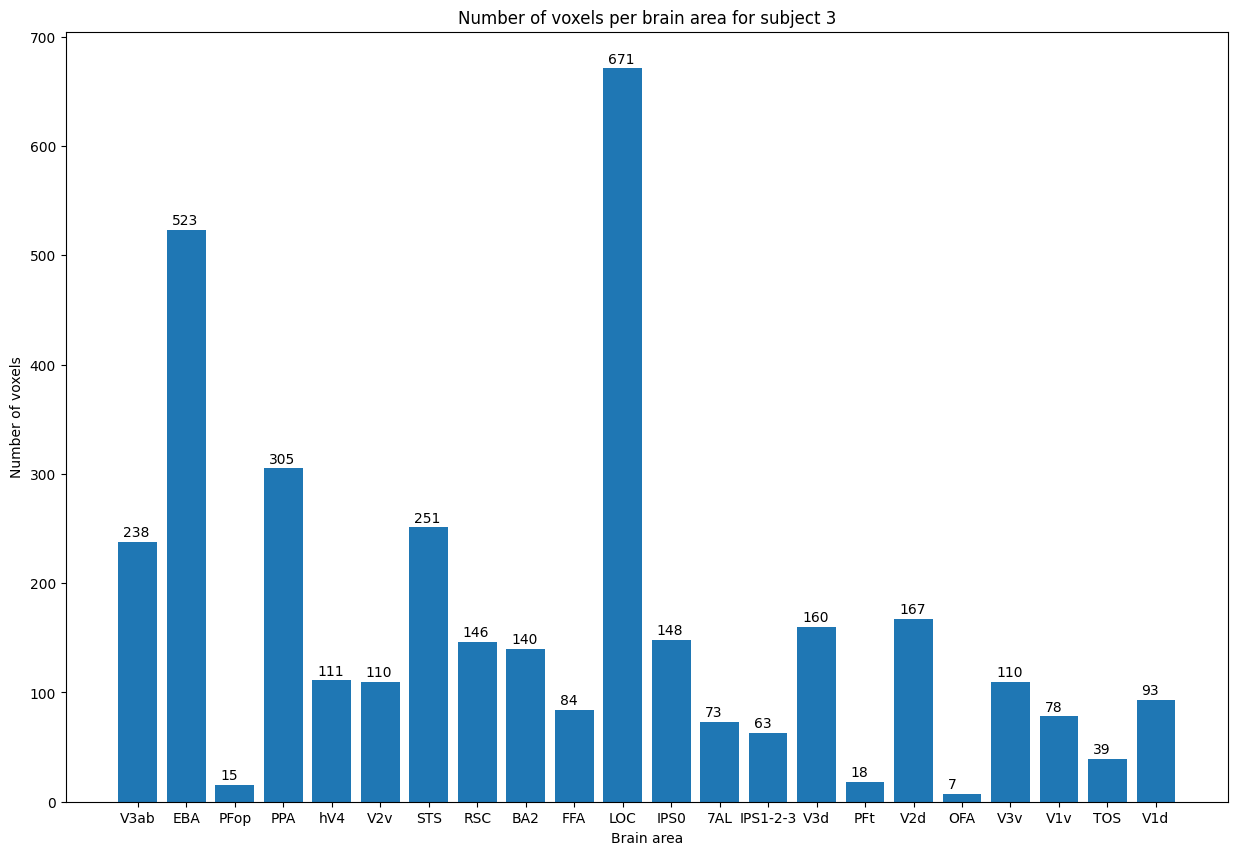

In [6]:
# Bar chart with number of voxels for each brain area

from utils import load_all_fmri_for_subject

def num_voxels_per_brain_area(path: str) -> None:

    fmri_data = load_all_fmri_for_subject(path)

    voxels = {}
    for brain_area, data in fmri_data.items():
        if brain_area == 'WB': continue
        voxels[brain_area] = data['test_data'].shape[2]

    plt.figure(figsize=(15, 10))
    plt.bar(voxels.keys(), voxels.values())
    plt.xlabel('Brain area')
    plt.ylabel('Number of voxels')
    plt.title('Number of voxels per brain area for subject 3')
    # Show numbers on top of bars
    for i, v in enumerate(voxels.values()):
        plt.text(i - 0.3, v + 5, str(v))
    plt.show()

num_voxels_per_brain_area("./data/sub03")
        

['sub01', 'sub02', 'sub03', 'sub04', 'sub05', 'sub06', 'sub07', 'sub08', 'sub09', 'sub10']
{'V3ab': [237, 279, 238, 257, 144, 204, 127, 205, 276, 184], 'EBA': [441, 337, 523, 483, 405, 371, 145, 179, 410, 280], 'PFop': [122, 65, 15, 53, 46, 58, 41, 73, 87, 92], 'PPA': [366, 153, 305, 231, 210, 212, 155, 269, 159], 'hV4': [108, 95, 111, 118, 77, 106, 84, 95, 59], 'V2v': [77, 81, 110, 47, 77, 121, 64, 84, 57, 91], 'STS': [249, 430, 251, 359, 217, 184, 91, 293, 342, 126], 'RSC': [216, 247, 146, 220, 127, 209, 94, 185, 55], 'BA2': [319, 231, 140, 103, 116, 249, 60, 193, 268, 215], 'FFA': [69, 157, 84, 250, 70, 128, 94, 200, 75, 69], 'LOC': [736, 683, 671, 698, 546, 635, 636, 608, 560], 'IPS0': [156, 170, 148, 188, 146, 146, 133, 203, 125], '7AL': [81, 80, 73, 86, 75, 123, 23, 81, 75, 38], 'IPS1-2-3': [115, 113, 63, 116, 105, 106, 88, 141, 80], 'V3d': [156, 157, 160, 138, 89, 133, 130, 161, 123], 'PFt': [107, 81, 18, 42, 48, 83, 34, 67, 68, 53], 'V2d': [147, 150, 167, 164, 117, 157, 152, 21

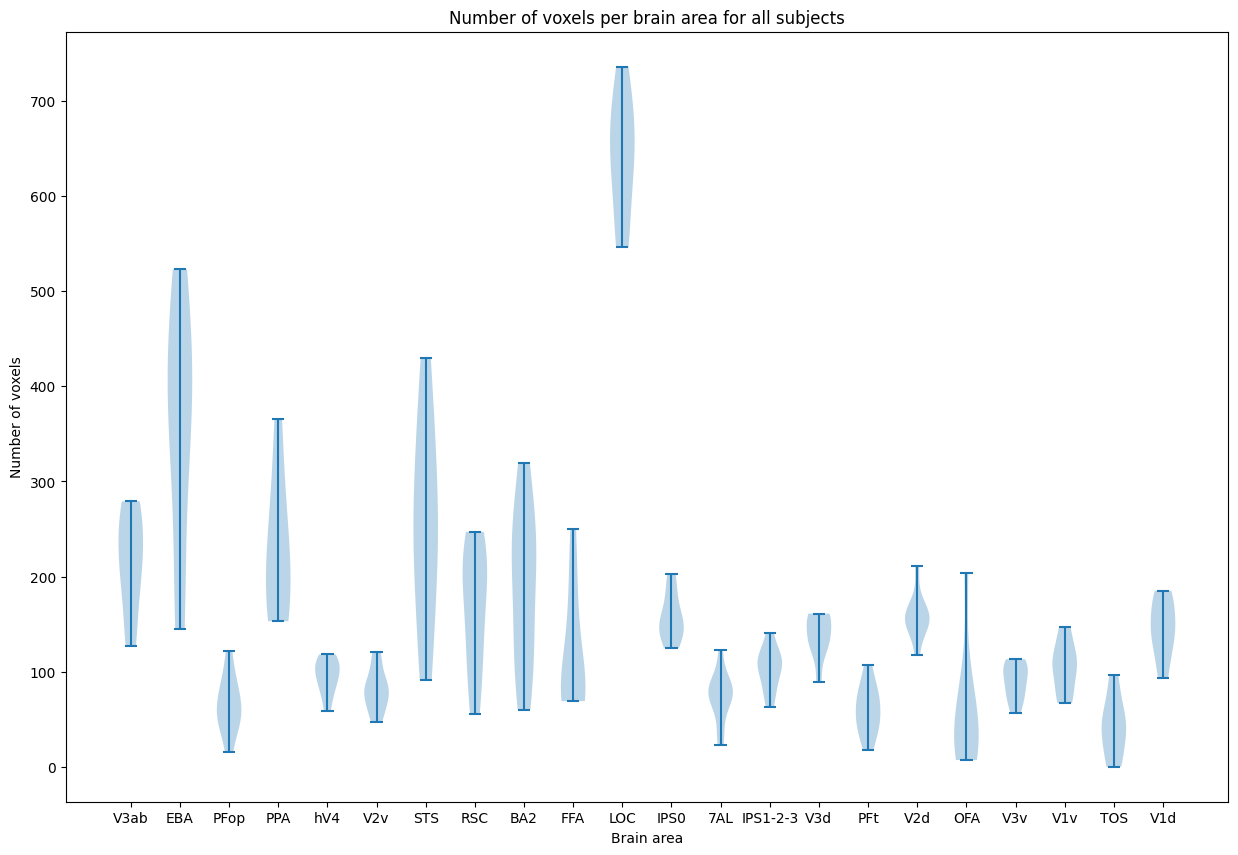

In [10]:
# Violin plot of number of voxels per brain area over all subjects

def num_voxels_per_brain_area_all_subjects(path: str) -> None:
    
        subjects = [f for f in os.listdir(path) if f.startswith('sub')]
        subjects.sort()
        print(subjects)
    
        voxels = {}
        for s in subjects:
            fmri_data = load_all_fmri_for_subject(os.path.join(path, s))
            for brain_area, data in fmri_data.items():
                if brain_area == 'WB': continue
                if brain_area not in voxels:
                    voxels[brain_area] = []
                voxels[brain_area].append(data['test_data'].shape[2])
    
        print(voxels)
    
        plt.figure(figsize=(15, 10))
        plt.violinplot(voxels.values())
        plt.xticks(np.arange(1, len(voxels.keys()) + 1), voxels.keys())
        plt.xlabel('Brain area')
        plt.ylabel('Number of voxels')
        plt.title('Number of voxels per brain area for all subjects')
        plt.show()

num_voxels_per_brain_area_all_subjects("./data")

In [9]:
# Use nomic to generate atlas

# from nomic import atlas
# import numpy as np

# embeddings = np.mean(data['train_data'], axis=1)
        
# project = atlas.map_embeddings(embeddings=embeddings)

2023-07-01 01:50:57.923 | WARNING  | nomic.atlas:map_embeddings:91 - An ID field was not specified in your data so one was generated for you in insertion order.
2023-07-01 01:50:59.936 | INFO     | nomic.project:_create_project:749 - Creating project `nappy-snug` in organization `camilofosco`
2023-07-01 01:51:01.553 | INFO     | nomic.atlas:map_embeddings:107 - Uploading embeddings to Atlas.
1it [00:04,  4.46s/it]
2023-07-01 01:51:06.036 | INFO     | nomic.project:_add_data:1371 - Upload succeeded.
2023-07-01 01:51:06.036 | INFO     | nomic.atlas:map_embeddings:126 - Embedding upload succeeded.
2023-07-01 01:51:07.045 | INFO     | nomic.project:create_index:1081 - Created map `nappy-snug` in project `nappy-snug`: https://atlas.nomic.ai/map/5f8f20b9-b582-4259-a74f-3d23167c651a/5eb11d91-1786-4cc3-8120-edce9bb3499a
2023-07-01 01:51:07.046 | INFO     | nomic.atlas:map_embeddings:139 - nappy-snug: https://atlas.nomic.ai/map/5f8f20b9-b582-4259-a74f-3d23167c651a/5eb11d91-1786-4cc3-8120-edce9b

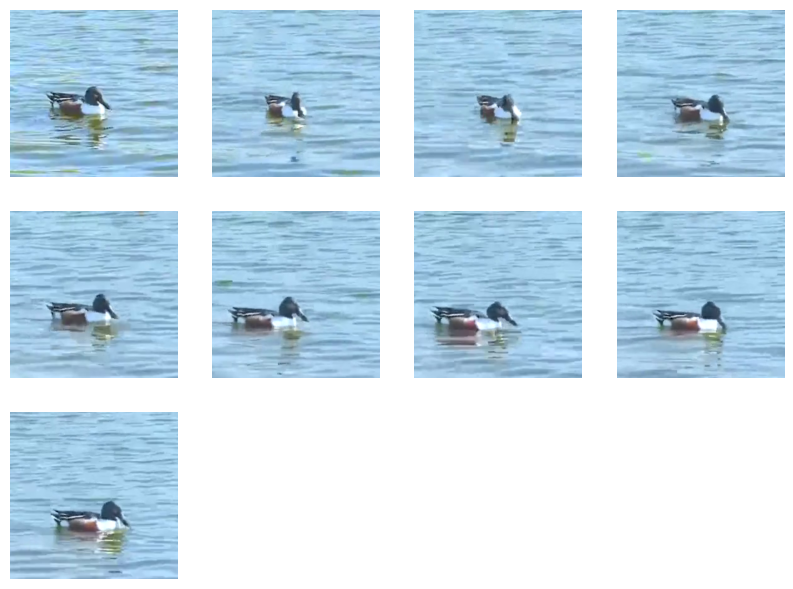

In [5]:
# Load a video and plot it

import cv2

def load_video(path):
    """
    Load a video and return it as a numpy array
    """
    cap = cv2.VideoCapture(path)
    frames = []
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret == False:
            break
        frames.append(frame)
    cap.release()
    return np.array(frames)

def plot_video(video, frames_to_skip):
    """
    Plot a video with a subplot for each frame, skipping frames_to_skip frames
    """
    plt.figure(figsize=(10, 10))
    for i, frame in enumerate(video[::frames_to_skip]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    plt.show()

video = load_video('./data/stimuli_mp4/0001.mp4')
plot_video(video, frames_to_skip=10)

Predicted memorability: 0.7708958387374878


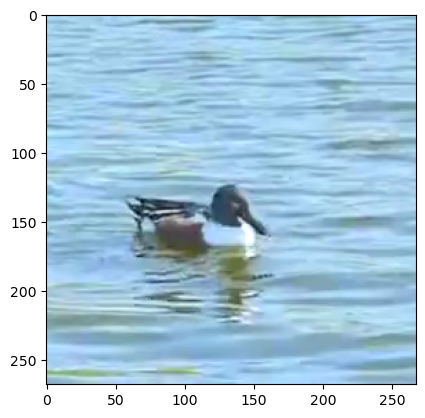

In [13]:
# Measure memorability of each frame using Vitmem

from vitmem import ViTMem
from PIL import Image
model = ViTMem()

# Transform video frame into PIL Image object
video_frame = Image.fromarray(cv2.cvtColor(video[0], cv2.COLOR_BGR2RGB))
# show image
memorability = model(video_frame)
print(f"Predicted memorability: {memorability}")

### Test the fmri loading functions

In [8]:
from regress import load_boldmoments_betas_raw

train, test = load_boldmoments_betas_raw('../data/betas_raw/sub01', roi=['WB','EBA','PPA'])
print(train.shape)
print(test.shape)

(1000, 19127)
(102, 19127)


In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import sys
sys.path.append('../')
import os
import pickle as pkl
import numpy as np

def load_boldmoments_betas_impulse(path_to_subject_data: str, roi: list, avg_train_reps=False) -> None:
    
    betas_impulse_train_list = []
    betas_impulse_test_list = []

    for r in roi:
        pkl_name = f'{r}_betas-GLMsingle_type-typed_z=1.pkl'
        with open(os.path.join(path_to_subject_data, 'prepared_allvoxel_pkl', pkl_name), 'rb') as f:
            data = pkl.load(f)

        print(data.keys())
        print(data['train_data_allvoxel'].shape)
        print(data['test_data_allvoxel'].shape)
        print(data['train_noiseceiling_allvoxel'].shape)
        
        if avg_train_reps:
            betas_impulse_train_list.append( np.mean(data['train_data_allvoxel'], axis=1))
        else:
            # Concatenate all repetitions into dim 0
            data_train = np.concatenate([data['train_data_allvoxel'][:,i,:] for i in range(data['train_data_allvoxel'].shape[1])])
            data_test = np.concatenate([data['test_data_allvoxel'][:,i,:] for i in range(data['test_data_allvoxel'].shape[1])])
            betas_impulse_train_list.append(data_train)
            betas_impulse_test_list.append(data_test)
        
        betas_impulse_test_list.append( np.mean(data['test_data_allvoxel'], axis=1))

        # TODO: add noise ceiling

    betas_impulse_train_npy = np.concatenate(betas_impulse_train_list, axis=1)
    betas_impulse_test_npy = np.concatenate(betas_impulse_test_list, axis=1)


    return betas_impulse_train_npy, betas_impulse_test_npy


train, test = load_boldmoments_betas_impulse('../data/betas_impulse/sub01/', roi=['BMDgeneral'])
print(train.shape)
print(test.shape)

dict_keys(['test_data_allvoxel', 'test_noiseceiling_allvoxel', 'train_data_allvoxel', 'train_noiseceiling_allvoxel', 'roi_indices_fullvolume'])


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1020 and the array at index 1 has size 102

In [4]:
from einops import rearrange
pkl_name = f'BMDgeneral_betas-GLMsingle_type-typed_z=1.pkl'
with open(os.path.join('../data/betas_impulse/sub01/prepared_allvoxel_pkl/', pkl_name), 'rb') as f:
    data = pkl.load(f)

data_train = np.concatenate([data['train_data_allvoxel'][:,i,:] for i in range(data['train_data_allvoxel'].shape[1])])

data_train_re = rearrange(data['train_data_allvoxel'], 'n v f -> (n v) f')

# assert that first value and value 1001 are the same
k = 999
print(data['train_data_allvoxel'][k,0,0])
print(data_train[k,0])
print(data_train_re[k,0])

assert np.allclose(data['train_data_allvoxel'][0,2], data_train[2000])


-0.600400802057303
-0.600400802057303
-0.5821662586690658


In [ ]:
data_train_dearranged = rearrange(data_train, '(n v) f -> n v f', n=1001)

In [43]:



def load_target_vectors(path_to_target_vectors: str, repeat=1) -> None:
    """
    Load target vectors for a given subject
    """
    target_train = []
    target_test = []

    train_list = list(range(1001))

    for target in os.listdir(path_to_target_vectors):
        if int(target.split('.')[0]) in train_list:
            target_train.append(np.load(f'{path_to_target_vectors}/{target}'))
        else:
            target_test.append(np.load(f'{path_to_target_vectors}/{target}'))

    target_train = np.array(target_train*repeat)
    target_test = np.array(target_test)

    
    return target_train, target_test


target_train, target_test = load_target_vectors('../data/target_vectors/c_zeroscope', repeat=3)

assert(np.allclose(target_train[2], target_train[2002]))

print(target_train.shape)
print(target_test.shape)

(3000, 78848)
(102, 78848)


### Check the annotations


In [3]:
# Load annots
import json

annots = json.load(open('./data/annotations.json', 'r'))

print(annots['0001'].keys())

dict_keys(['bmd_matrixfilename', 'MiT_url', 'MiT_filename', 'set', 'objects', 'scenes', 'actions', 'text_descriptions', 'spoken_transcription', 'memorability_score', 'memorability_decay'])


In [4]:
print(annots['0001']['text_descriptions'])

['A duck is swimming in a lake searching for food', 'A duck is floating atop the blue sparkly looking water.', 'A duck swims along in the water and pecks at the water.', 'A mallard is in the water alone swimming around and putting its beak in.', 'A duck swims in the daytime while pecking at the water.']


# Check the precomputed target vectors

In [9]:
import os
import numpy as np

path_to_c_targets = './data/target_vectors/c_zeroscope'
path_to_z_targets = './data/target_vectors/z_zeroscope'

z_targets = []

for z in os.listdir(path_to_z_targets):
    z_targets.append(np.load(os.path.join(path_to_z_targets, z)))
print(len(z_targets))
print(z_targets[0].shape)

1102
(65340,)


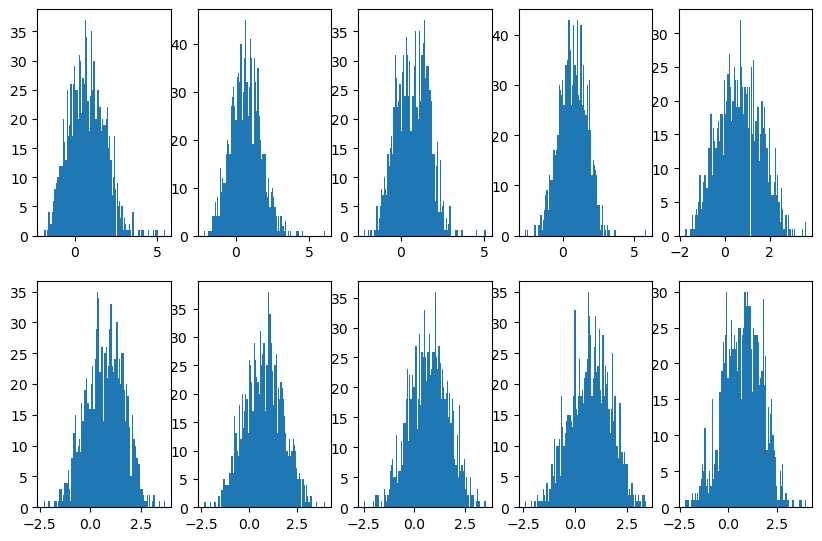

In [12]:
#plot distribution of first 10 dimensions of z_targets
import matplotlib.pyplot as plt

dims_to_plot = 25
plt.figure(figsize=(10, 10))
for i in range(dims_to_plot):
    plt.subplot(dims_to_plot//5+1, 5, i + 1)
    plt.hist([z[i] for z in z_targets], bins=100)

# Check NSD betas built to match BOLDMoments ROIs

In [1]:
import pickle as pkl
import os

for p in range(1,9):
    path_to_subject_data = f'../data/betas_nsd/sub0{p}'
    subfolder = 'prepared_allvoxel_pkl'
    roi = 'BMDgeneral'
    pkl_name = f'{roi}_betas-GLMsingle_type-typeb_z=1.pkl'
    with open(os.path.join(path_to_subject_data, subfolder, pkl_name), 'rb') as f:
        data = pkl.load(f)

    print(p)
    print(data.keys())
    try:
        print(data['data_allvoxel'].shape)
    except:
        print('allvoxel not found')
        print(data['data_reliable'].shape)
    # print(data['data_reliable'].shape)
    # print(data['noiseceiling_reliable'].shape)

    # if avg_train_reps:
    #     betas_impulse_train_list.append( np.mean(data['train_data_allvoxel'], axis=1))
    # else:
    #     # Concatenate all repetitions into dim 0
    #     data_train = np.concatenate([data['train_data_allvoxel'][:,i,:] for i in range(data['train_data_allvoxel'].shape[1])])
    #     betas_impulse_train_list.append(data_train)

1
dict_keys(['data_allvoxel', 'noiseceiling_allvoxel', 'roi_indices_fullvolume'])
(10000, 3, 16346)
2
dict_keys(['data_allvoxel', 'noiseceiling_allvoxel', 'roi_indices_fullvolume'])
(10000, 3, 16346)
3
dict_keys(['data_allvoxel', 'noiseceiling_allvoxel', 'roi_indices_fullvolume'])
(6234, 3, 16346)
4
dict_keys(['data_allvoxel', 'noiseceiling_allvoxel', 'roi_indices_fullvolume'])
(5445, 3, 16346)


KeyboardInterrupt: 

# Check stimuli indexes used for each subject on NSD

In [34]:
# opt = parser.parse_args()
# subject = opt.subject
# atlasname = 'streams'

import os
import numpy as np
import pandas as pd
import sys
sys.path.append('../../StableDiffusionReconstruction/codes/utils/')
from nsd_access import NSDAccess
import scipy.io


nsda = NSDAccess('../../StableDiffusionReconstruction/nsd/')
nsd_expdesign = scipy.io.loadmat('../../StableDiffusionReconstruction/nsd/nsddata/experiments/nsd/nsd_expdesign.mat')

print('nsd_expdesign.keys()',nsd_expdesign.keys())

# Note that most of nsd_expdesign indices are 1-base index!
# This is why subtracting 1
sharedix = nsd_expdesign['sharedix'] -1 

for s in range(1,2):
    subject = 'subj%02d' % s
    print(subject)
    behs = pd.DataFrame()
    for i in range(1,41):
        beh = nsda.read_behavior(subject=subject, 
                                session_index=i)
        behs = pd.concat((behs,beh))

    print('behs.shape',behs.shape)
    display(behs.head())

    # Caution: 73KID is 1-based! https://cvnlab.slite.page/p/fRv4lz5V2F/Behavioral-data
    stims_unique = behs['73KID'].unique() - 1
    stims_all = behs['73KID'] - 1
    print(stims_unique)
    print("stims_unique.shape",stims_unique.shape)
    print("stims_all.shape",stims_all.shape)

    # Get all IDs that appear at least 3 times
    stims_unique_3 = behs['73KID'].value_counts()[behs['73KID'].value_counts()>=3].index.values - 1
    print("stims_unique_3.shape",stims_unique_3.shape)
    print(stims_unique_3)


# savedir = f'../../mrifeat/{subject}/'
# os.makedirs(savedir, exist_ok=True)

# if not os.path.exists(f'{savedir}/{subject}_stims.npy'):
#     np.save(f'{savedir}/{subject}_stims.npy',stims_all) # This is a list of all image IDs seen by the subject across the 38 sessions
#     np.save(f'{savedir}/{subject}_stims_ave.npy',stims_unique) # This is a list of all UNIQUE image IDs seen by the subject across the sessions

# for i in range(1,38):
#     print(i)
#     beta_trial = nsda.read_betas(subject=subject, 
#                             session_index=i, 
#                             trial_index=[], # empty list as index means get all for this session
#                             data_type='betas_fithrf_GLMdenoise_RR',
#                             data_format='func1pt8mm')
#     if i==1:
#         betas_all = beta_trial
#     else:
#         betas_all = np.concatenate((betas_all,beta_trial),0)    
    

nsd_expdesign.keys() dict_keys(['__header__', '__version__', '__globals__', 'basiccnt', 'masterordering', 'sharedix', 'stimpattern', 'subjectim'])
subj01
behs.shape (30000, 19)


,SUBJECT,SESSION,RUN,TRIAL,73KID,10KID,TIME,ISOLD,ISCORRECT,RT,CHANGEMIND,MEMORYRECENT,MEMORYFIRST,ISOLDCURRENT,ISCORRECTCURRENT,TOTAL1,TOTAL2,BUTTON,MISSINGDATA
0,1,1,1,1,46003,626,0.505082,0,1.0,803.529781,0.0,NaN,NaN,0,1.0,1,0,1.0,0
1,1,1,1,2,61883,5013,0.505128,0,1.0,972.261383,0.0,NaN,NaN,0,1.0,1,0,1.0,0
2,1,1,1,3,829,4850,0.505175,0,1.0,742.351236,0.0,NaN,NaN,0,1.0,1,0,1.0,0
3,1,1,1,4,67574,8823,0.505221,0,1.0,747.518479,0.0,NaN,NaN,0,1.0,1,0,1.0,0
4,1,1,1,5,16021,9538,0.505267,0,1.0,547.422774,0.0,NaN,NaN,0,1.0,1,0,1.0,0


[46002 61882   828 ... 12495 52259 37846]
stims_unique.shape (10000,)
stims_all.shape (30000,)
stims_unique_3.shape (10000,)
[46002 55872 32024 ... 60016  5823 37846]


In [4]:
import pickle as pkl

with open('../data/betas_nsd/sub04/events_imgtag-73k_id.pkl', 'rb') as f:
    events = pkl.load(f)

print(events)
print(len(events))
print(events[0])
print(type(events[0][0]))
print(len(events[0]))
print(len(events[1]))
print(len(events[2]))
print(events[2])
print(len(events[2][2]))

([32773, 13, 17, 21, 65567, 32801, 65570, 34, 65576, 65582, 46, 32816, 65588, 52, 65591, 32835, 32836, 32837, 65611, 78, 82, 32860, 105, 32888, 32892, 125, 65668, 32902, 32911, 144, 65687, 152, 159, 32936, 174, 32947, 32948, 181, 179, 32949, 197, 65739, 204, 32978, 65760, 65770, 238, 242, 33011, 65780, 245, 250, 258, 261, 263, 65800, 272, 65809, 33042, 274, 33050, 33053, 65828, 65833, 33068, 310, 65853, 33101, 33102, 65871, 65873, 33108, 33112, 33119, 365, 372, 65909, 375, 65911, 379, 382, 65921, 33161, 33163, 33172, 65944, 412, 65956, 427, 429, 434, 33212, 33215, 447, 65986, 33219, 65989, 65992, 66005, 66006, 33239, 66007, 33246, 66020, 66021, 33254, 33255, 66035, 66041, 33274, 33284, 33293, 33295, 66064, 66063, 66077, 543, 66081, 66083, 66087, 33322, 66113, 33360, 66135, 33368, 605, 66144, 33376, 33380, 66150, 615, 66171, 637, 66174, 33408, 641, 644, 66183, 649, 650, 658, 66212, 66214, 66217, 33452, 66222, 66224, 693, 66229, 33461, 33464, 699, 66235, 713, 33482, 717, 33486, 66257, 33

In [4]:
# Load z_zeroscope target vectors
import os
import numpy as np
target = np.load('../data/target_vectors/z_zeroscope_unflattened/0022.npy')

print(target.shape)

(15, 4, 33, 33)
